## Data Analysis
### Run details:
+ NS_max_iter 10000000 
+ NS_sampling_efficiency 0.15
+ NS_evidence_tolerance 0.8
+ NS_n_live_points 1000 


In [1]:
#Show plots inline, and load main getdist plot module and samples class
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist, IPython
import pylab as plt
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
#matplotlib 2 doesn't seem to work well without usetex on
plt.rcParams['text.usetex']=True

import numpy as np 

GetDist Version: 1.1.3, Matplotlib version: 3.3.4


In [2]:
names_k1k  = ['omega_cdm', 'S_8', 'omega_b', 'n_s', 'h', 'Omega_m', 'sigma8']
labels_k1k = [r'\omega_{\rm{cdm}}', r'S_{\rm{8}}', r'\omega_{\rm{b}}', r'n_{\rm{s}}', 'h', r'\Omega_{\rm{m}}', r'\sigma8']

names_comp = ['S8_geo', 'Omega_m_geo', 'sigma8_geo', 'S8_gro', 'Omega_m_gro', 'sigma8_gro']
labels_comp = [r'S_{\rm{8}}^{\rm{geo}}',  r'\Omega_{\rm{m}}^{\rm{geo}}', r'\sigma_{\rm{8}}^{\rm{geo}}',
               r'S_{\rm{8}}^{\rm{gro}}',  r'\Omega_{\rm{m}}^{\rm{gro}}', r'\sigma_{\rm{8}}^{\rm{gro}}']

In [3]:
planck1 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_1.txt')
planck2 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_2.txt')
planck3 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_3.txt')
planck4 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_4.txt')

planck_tot = np.concatenate((planck1, planck2, planck3, planck4), axis=0)

In [4]:
planck_params = []
for item in planck_tot:
    planck_params.append([(item[29]/100)*(item[29]/100)*(item[31] - item[2]), item[35], item[2],  item[7], item[29]/100, item[31], item[34]])
planck_params = np.array(planck_params)
planck= MCSamples(samples=planck_params, names = names_k1k, labels = labels_k1k, label= 'Planck 2018',
                    weights=np.transpose(planck_tot)[0],loglikes=np.transpose(planck_tot)[1])

Removed no burn in


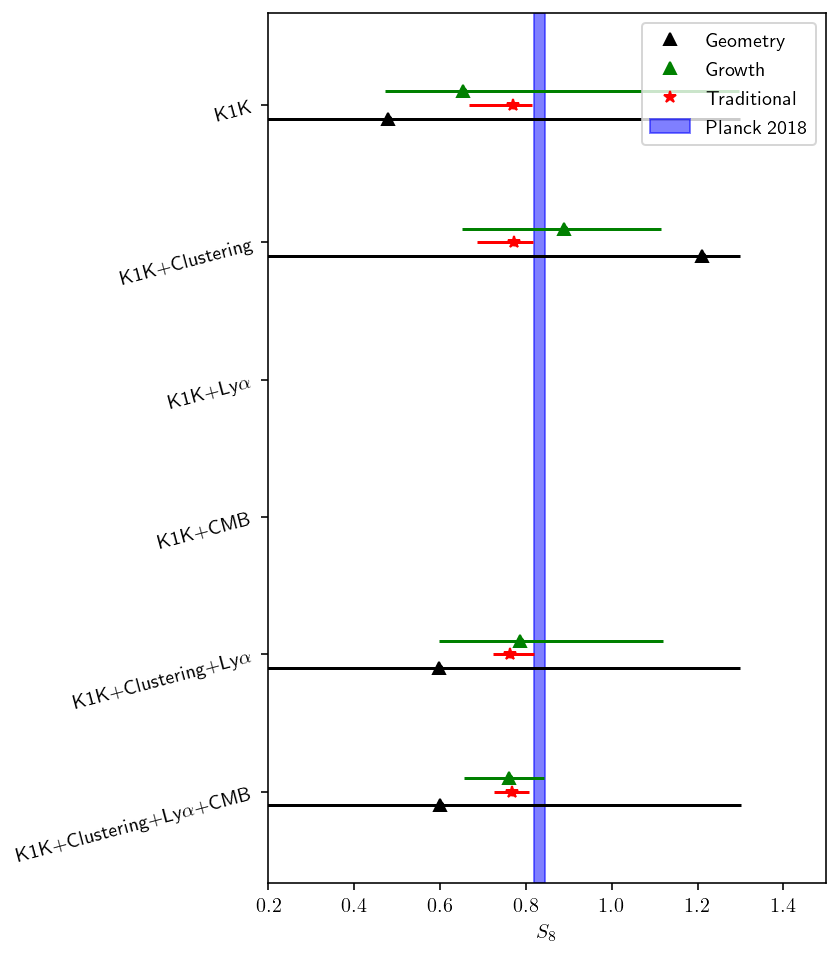

In [5]:
y = [0,3,6,9,12,15]
y_1 = [0.3, 3.3 ,6.3 ,9.3, 12.3, 15.3 ]
y_2 = [-0.3, 2.7 ,5.7 ,8.7, 11.7, 14.7 ]
my_yticks = ['K1K', 'K1K+Clustering', r'K1K+Ly$\alpha$', 'K1K+CMB', 
             r'K1K+Clustering+Ly$\alpha$', r'K1K+Clustering+Ly$\alpha$+CMB']

S8_gro = np.array([ 6.5306910E-01,  8.8822390E-01,
                   0, 0, 
                   7.8542670E-01, 7.6140770E-01 ])
S8_geo = np.array([4.7847330E-01, 1.2097570E+00,
                   0, 0,
                   5.9739340E-01, 5.9898280E-01  ])
S8 = np.array([7.6928820E-01, 7.7199000E-01, 
               0, 0, 
               7.6308900E-01, 7.6702690E-01])


S8_geo_err =  np.array([[1.0021000E-01,  1.2999400E+00], [ 1.0027160E-01,  1.2999580E+00],
                        [0, 0], [0, 0],
                       [1.0068670E-01, 1.2999530E+00], [1.0003690E-01,  1.2999890E+00] ])
S8_gro_err =  np.array([[4.7154070E-01, 1.2961020E+00], [6.5122020E-01,  1.1146330E+00],
                        [0, 0], [0, 0],
                       [5.9687930E-01,  1.1199140E+00], [6.5558560E-01,  8.4157290E-01 ]])
S8_err = np.array([[6.6769320E-01, 8.1443390E-01], [6.8579000E-01,  8.1683350E-01],
                   [0, 0], [0, 0], 
                  [7.2357380E-01, 8.1899680E-01], [7.2660790E-01, 8.0655340E-01] ])


for counter, entry in enumerate(S8_err):
    entry[0] = S8[counter]-entry[0]
    entry[1] = -S8[counter]+entry[1]

for counter, entry in enumerate(S8_gro_err):
    entry[0] = S8_gro[counter]-entry[0]
    entry[1] = -S8_gro[counter]+entry[1]
    
for counter, entry in enumerate(S8_geo_err):
    entry[0] = S8_geo[counter]-entry[0]
    entry[1] = -S8_geo[counter]+entry[1]
    
plt.figure(figsize=(5,8))
    

plt.xlabel(r'$S_{\rm{8}}$')

plt.errorbar( S8, y, xerr=np.transpose(S8_err), fmt='r.')
plt.errorbar(S8_geo, y_1,   xerr=np.transpose(S8_geo_err), fmt='k.')
plt.errorbar( S8_gro, y_2,  xerr=np.transpose(S8_gro_err), fmt='g.')

plt.plot( S8_geo, y_1, 'k^', label='Geometry')
plt.plot( S8_gro, y_2, 'g^', label='Growth')
plt.plot( S8, y, 'r*', label='Traditional')

plt.axvspan(0.832 - 0.013, 0.832 + 0.013, alpha = 0.5, color='b',  label='Planck 2018')

plt.legend()

plt.axis([0.2, 1.5,  17,-2,])


plt.yticks(y, my_yticks)
plt.yticks(rotation=15)


plt.show()

In [6]:
def munch_1cosmo(path, names, labels, name):
    chain = np.loadtxt(path+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights = cols[0]
    param_cols = np.append(cols[2:7], cols[-2:], axis=0)
    param_rows = np.transpose(param_cols)
    samples = MCSamples(samples=param_rows, names=names, labels=labels, label = name,
                        weights=weights, loglikes=loglikes)
    return samples

In [7]:
def munch_2cosmo(path, names, labels, name):
    chain = np.loadtxt(path+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights =  cols[0]
    param_cols_gro = np.append(cols[2:7], cols[-4:-2], axis=0)
    param_rows_gro = np.transpose(param_cols_gro)
    param_cols_geo = np.append(cols[7:12], cols[-2:], axis=0)
    param_rows_geo = np.transpose(param_cols_geo)
        
    samples_gro = MCSamples(samples=param_rows_gro, names=names, labels=labels, label=name+' gro', 
                        weights=weights, loglikes=loglikes)
    samples_geo = MCSamples(samples=param_rows_geo, names=names, labels=labels, label=name+' geo',
                        weights=weights, loglikes=loglikes)
    
    return samples_gro, samples_geo
    

In [8]:
def munch_comp(path, names, labels, name):
    chain = np.loadtxt(path+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights =  cols[0]
    param_cols_gro = np.append([cols[3]], cols[-4:-2], axis=0)
    param_cols_geo = np.append([cols[8]], cols[-2:], axis=0)
    comp_cols = np.append(param_cols_geo, param_cols_gro, axis=0)
    comp_rows = np.transpose(comp_cols)
        
    samples = MCSamples(samples=comp_rows, names=names, labels=labels, label=name+' gro', 
                        weights=weights, loglikes=loglikes)
    return samples
    

In [9]:
K1K = munch_1cosmo('K1K_1c', names_k1k, labels_k1k, 'K1K')
K1K_Cl = munch_1cosmo('K1K_Cl_1c', names_k1k, labels_k1k, 'K1K+Clustering')
K1K_ClLy = munch_1cosmo('K1K_ClLy_1c', names_k1k, labels_k1k, 'K1K+Clustering+Lya')
K1K_ClLyC = munch_1cosmo('K1K_ClLyC_1c', names_k1k, labels_k1k, 'K1K+Clustering+Lya+CMB')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [10]:
K1K_gro, K1K_geo = munch_2cosmo('K1K_bp', names_k1k, labels_k1k, 'K1K')
K1K_Cl_gro, K1K_Cl_geo = munch_2cosmo('K1K_clustering', names_k1k, labels_k1k, 'K1K+Clustering')
K1K_ClLy_gro, K1K_ClLy_geo = munch_2cosmo('K1K_clustering_lya', names_k1k, labels_k1k, r'K1K+Clustering+Ly$\alpha$')
K1K_ClLyC_gro, K1K_ClLyC_geo = munch_2cosmo('K1K_ClLyC', names_k1k, labels_k1k, 'K1K+Clustering+Lya+CMB')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [11]:
K1K_comp = munch_comp('K1K_bp', names_comp, labels_comp, 'K1K')
K1K_Cl_comp = munch_comp('K1K_clustering', names_comp, labels_comp, 'K1K+Clustering')
K1K_ClLy_comp = munch_comp('K1K_clustering_lya', names_comp, labels_comp, 'K1K+Clustering+Lya')
K1K_ClLyC_comp = munch_comp('K1K_ClLyC', names_comp, labels_comp, 'K1K+Clustering+Lya+CMB')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


# Comp plots

In [12]:
lims4 =[0.15, 0.5, 0.15, 0.5]
lims5 =[0.05, 1.45, 0.05, 1.45]
lims6 =[0.05, 1.3, 0.05, 1.3]

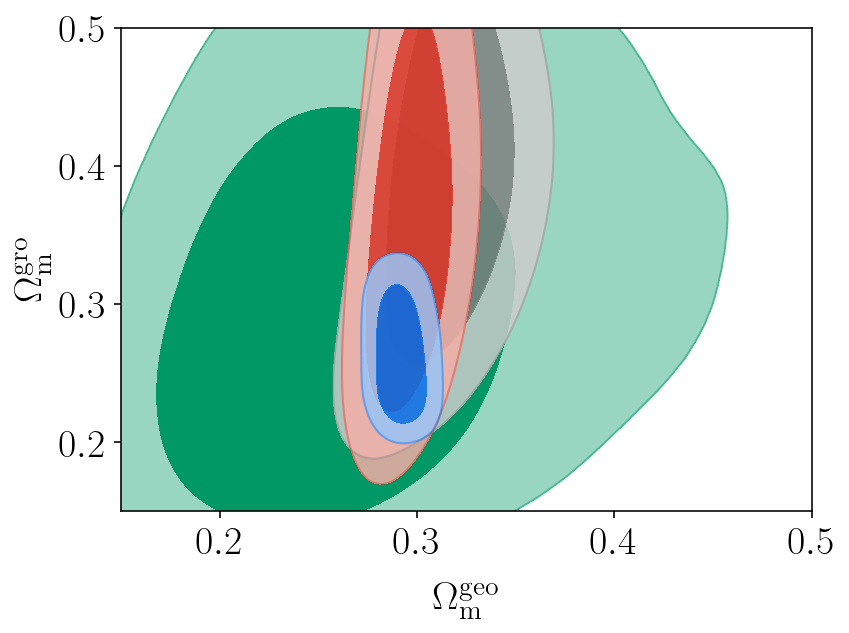

In [13]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([K1K_comp, K1K_Cl_comp, K1K_ClLy_comp, K1K_ClLyC_comp],
          'Omega_m_geo', 'Omega_m_gro', lims= lims4, filled=True);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/wmwm.png')

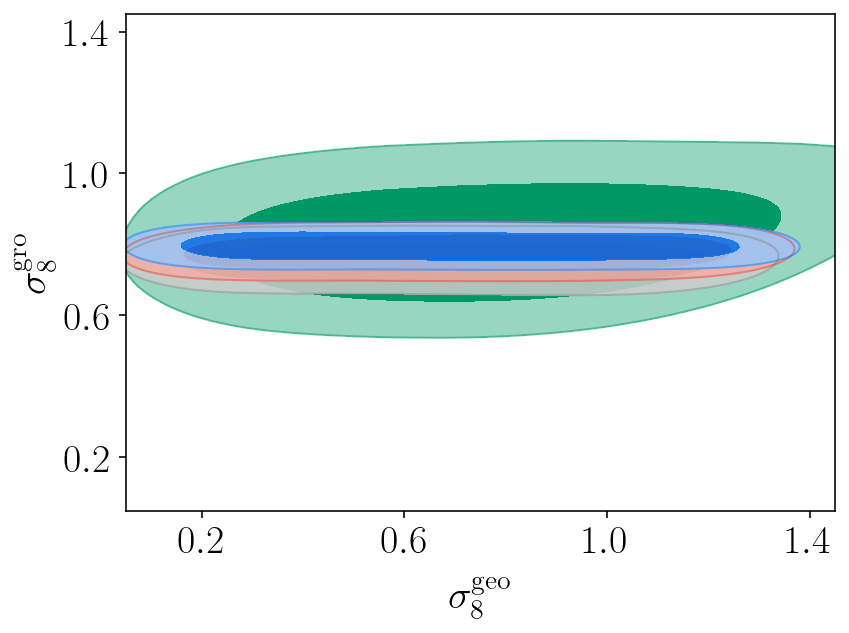

In [14]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([K1K_comp, K1K_Cl_comp, K1K_ClLy_comp, K1K_ClLyC_comp],
          'sigma8_geo', 'sigma8_gro', lims= lims5, filled=True);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/sigsig.png')

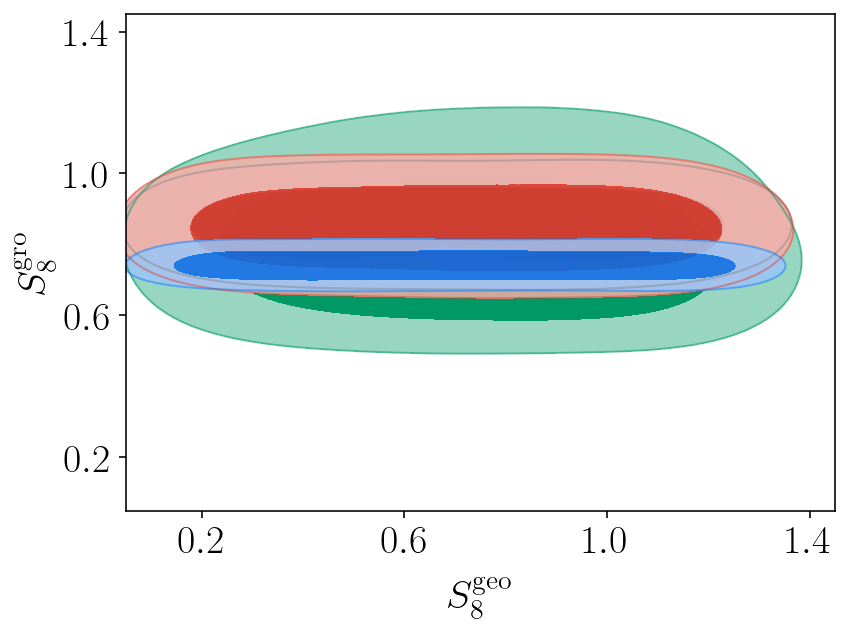

In [15]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([K1K_comp, K1K_Cl_comp, K1K_ClLy_comp, K1K_ClLyC_comp],
          'S8_geo', 'S8_gro', lims= lims5, filled=True);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/S8S8.png')

# K1K

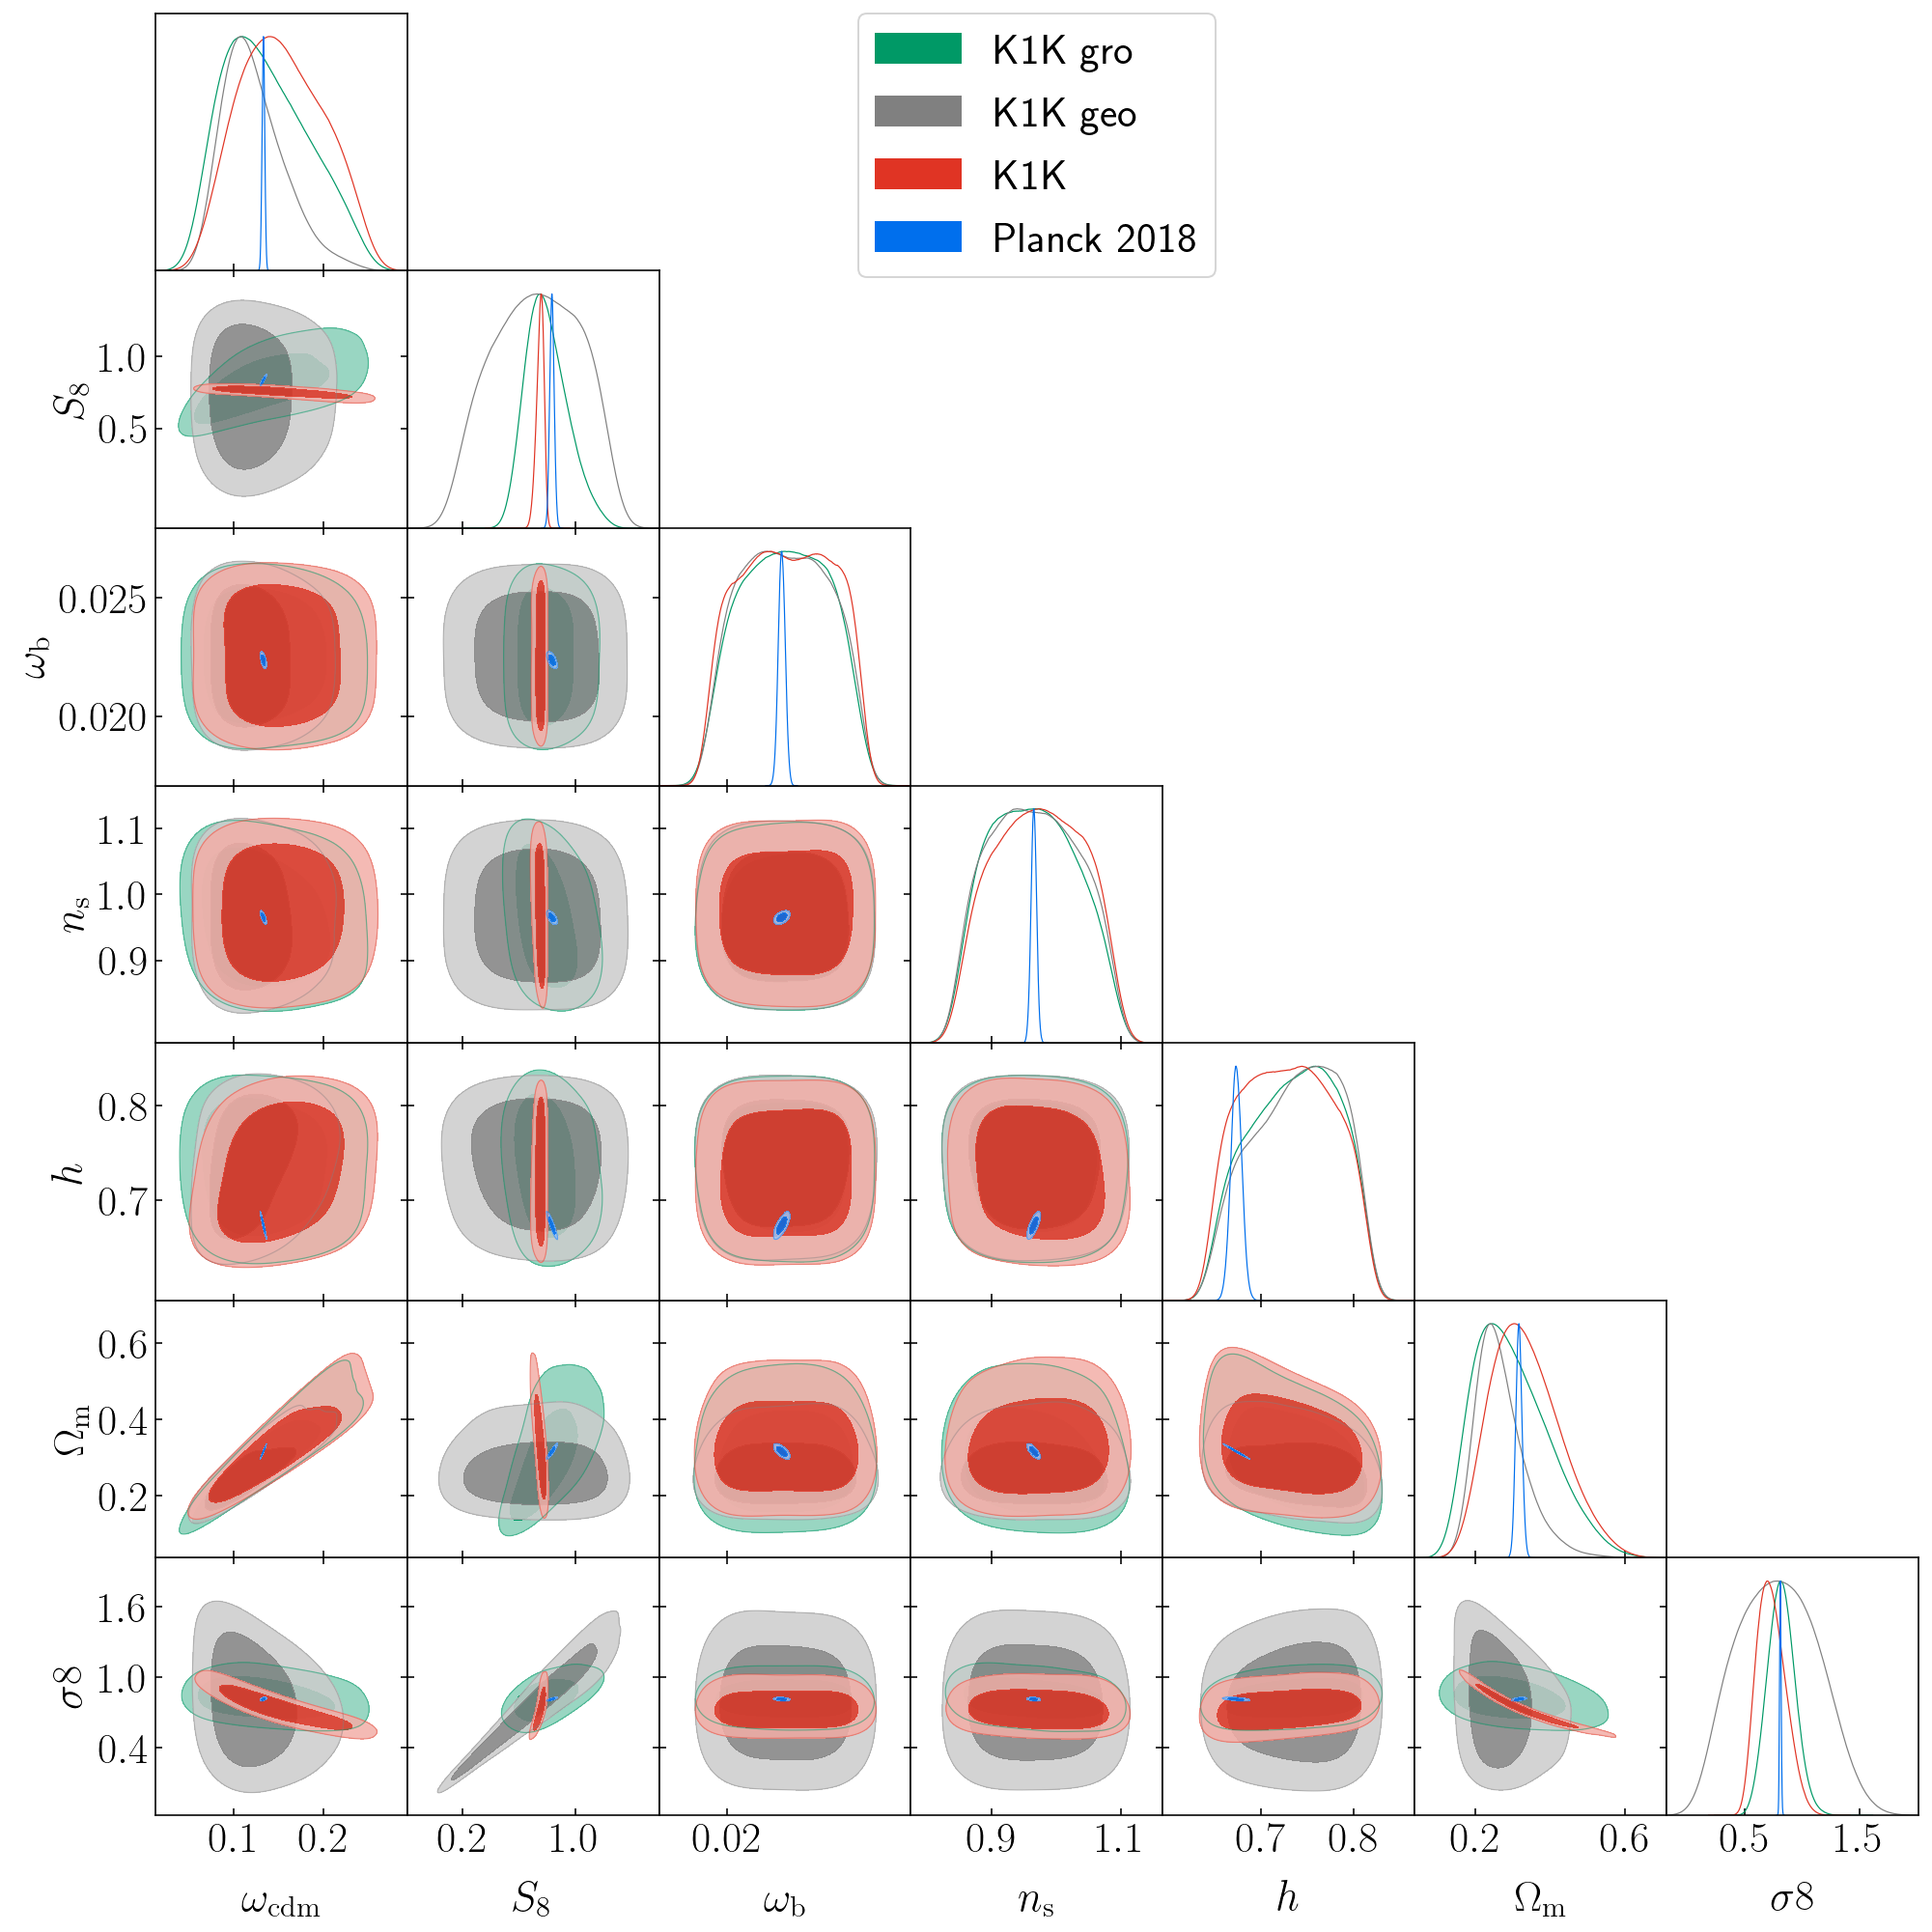

In [16]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot([K1K_gro, K1K_geo, K1K, planck], filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/K1K_triangle.pdf')

# K1K Clustering 

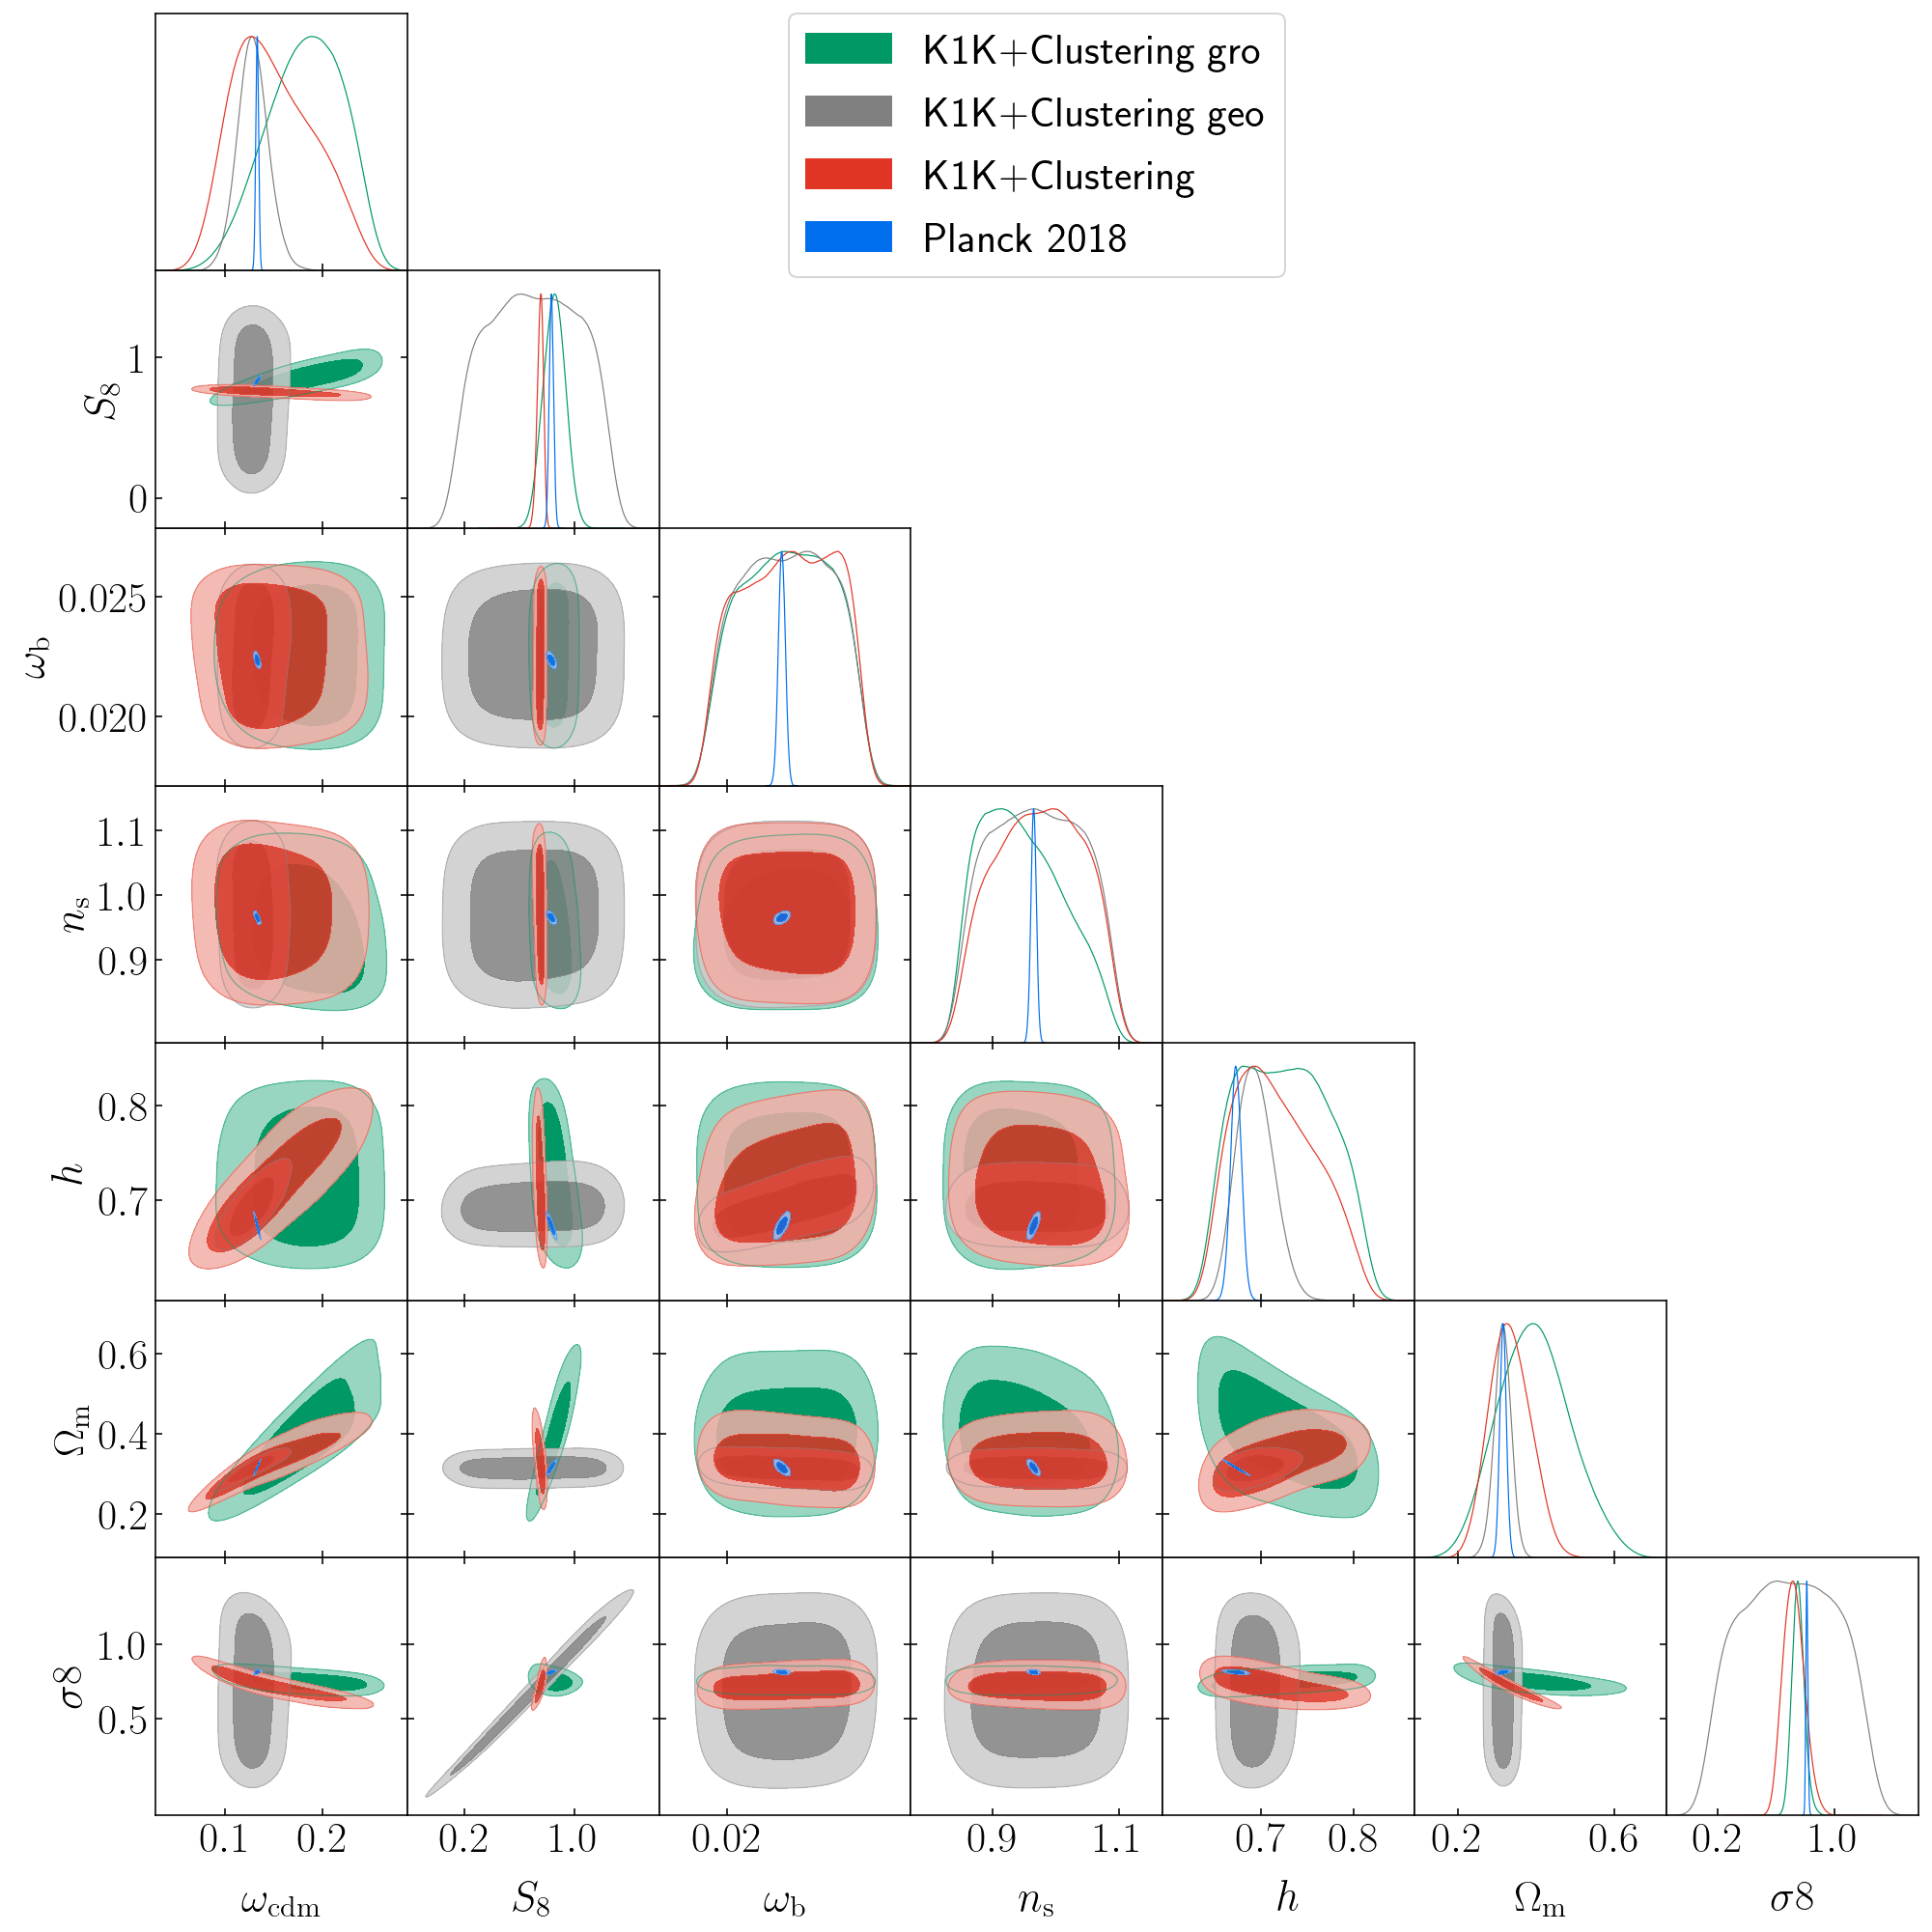

In [17]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot([K1K_Cl_gro, K1K_Cl_geo, K1K_Cl, planck], filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/K1K_Cl_triangle.pdf')

# K1K Clustering Lyman

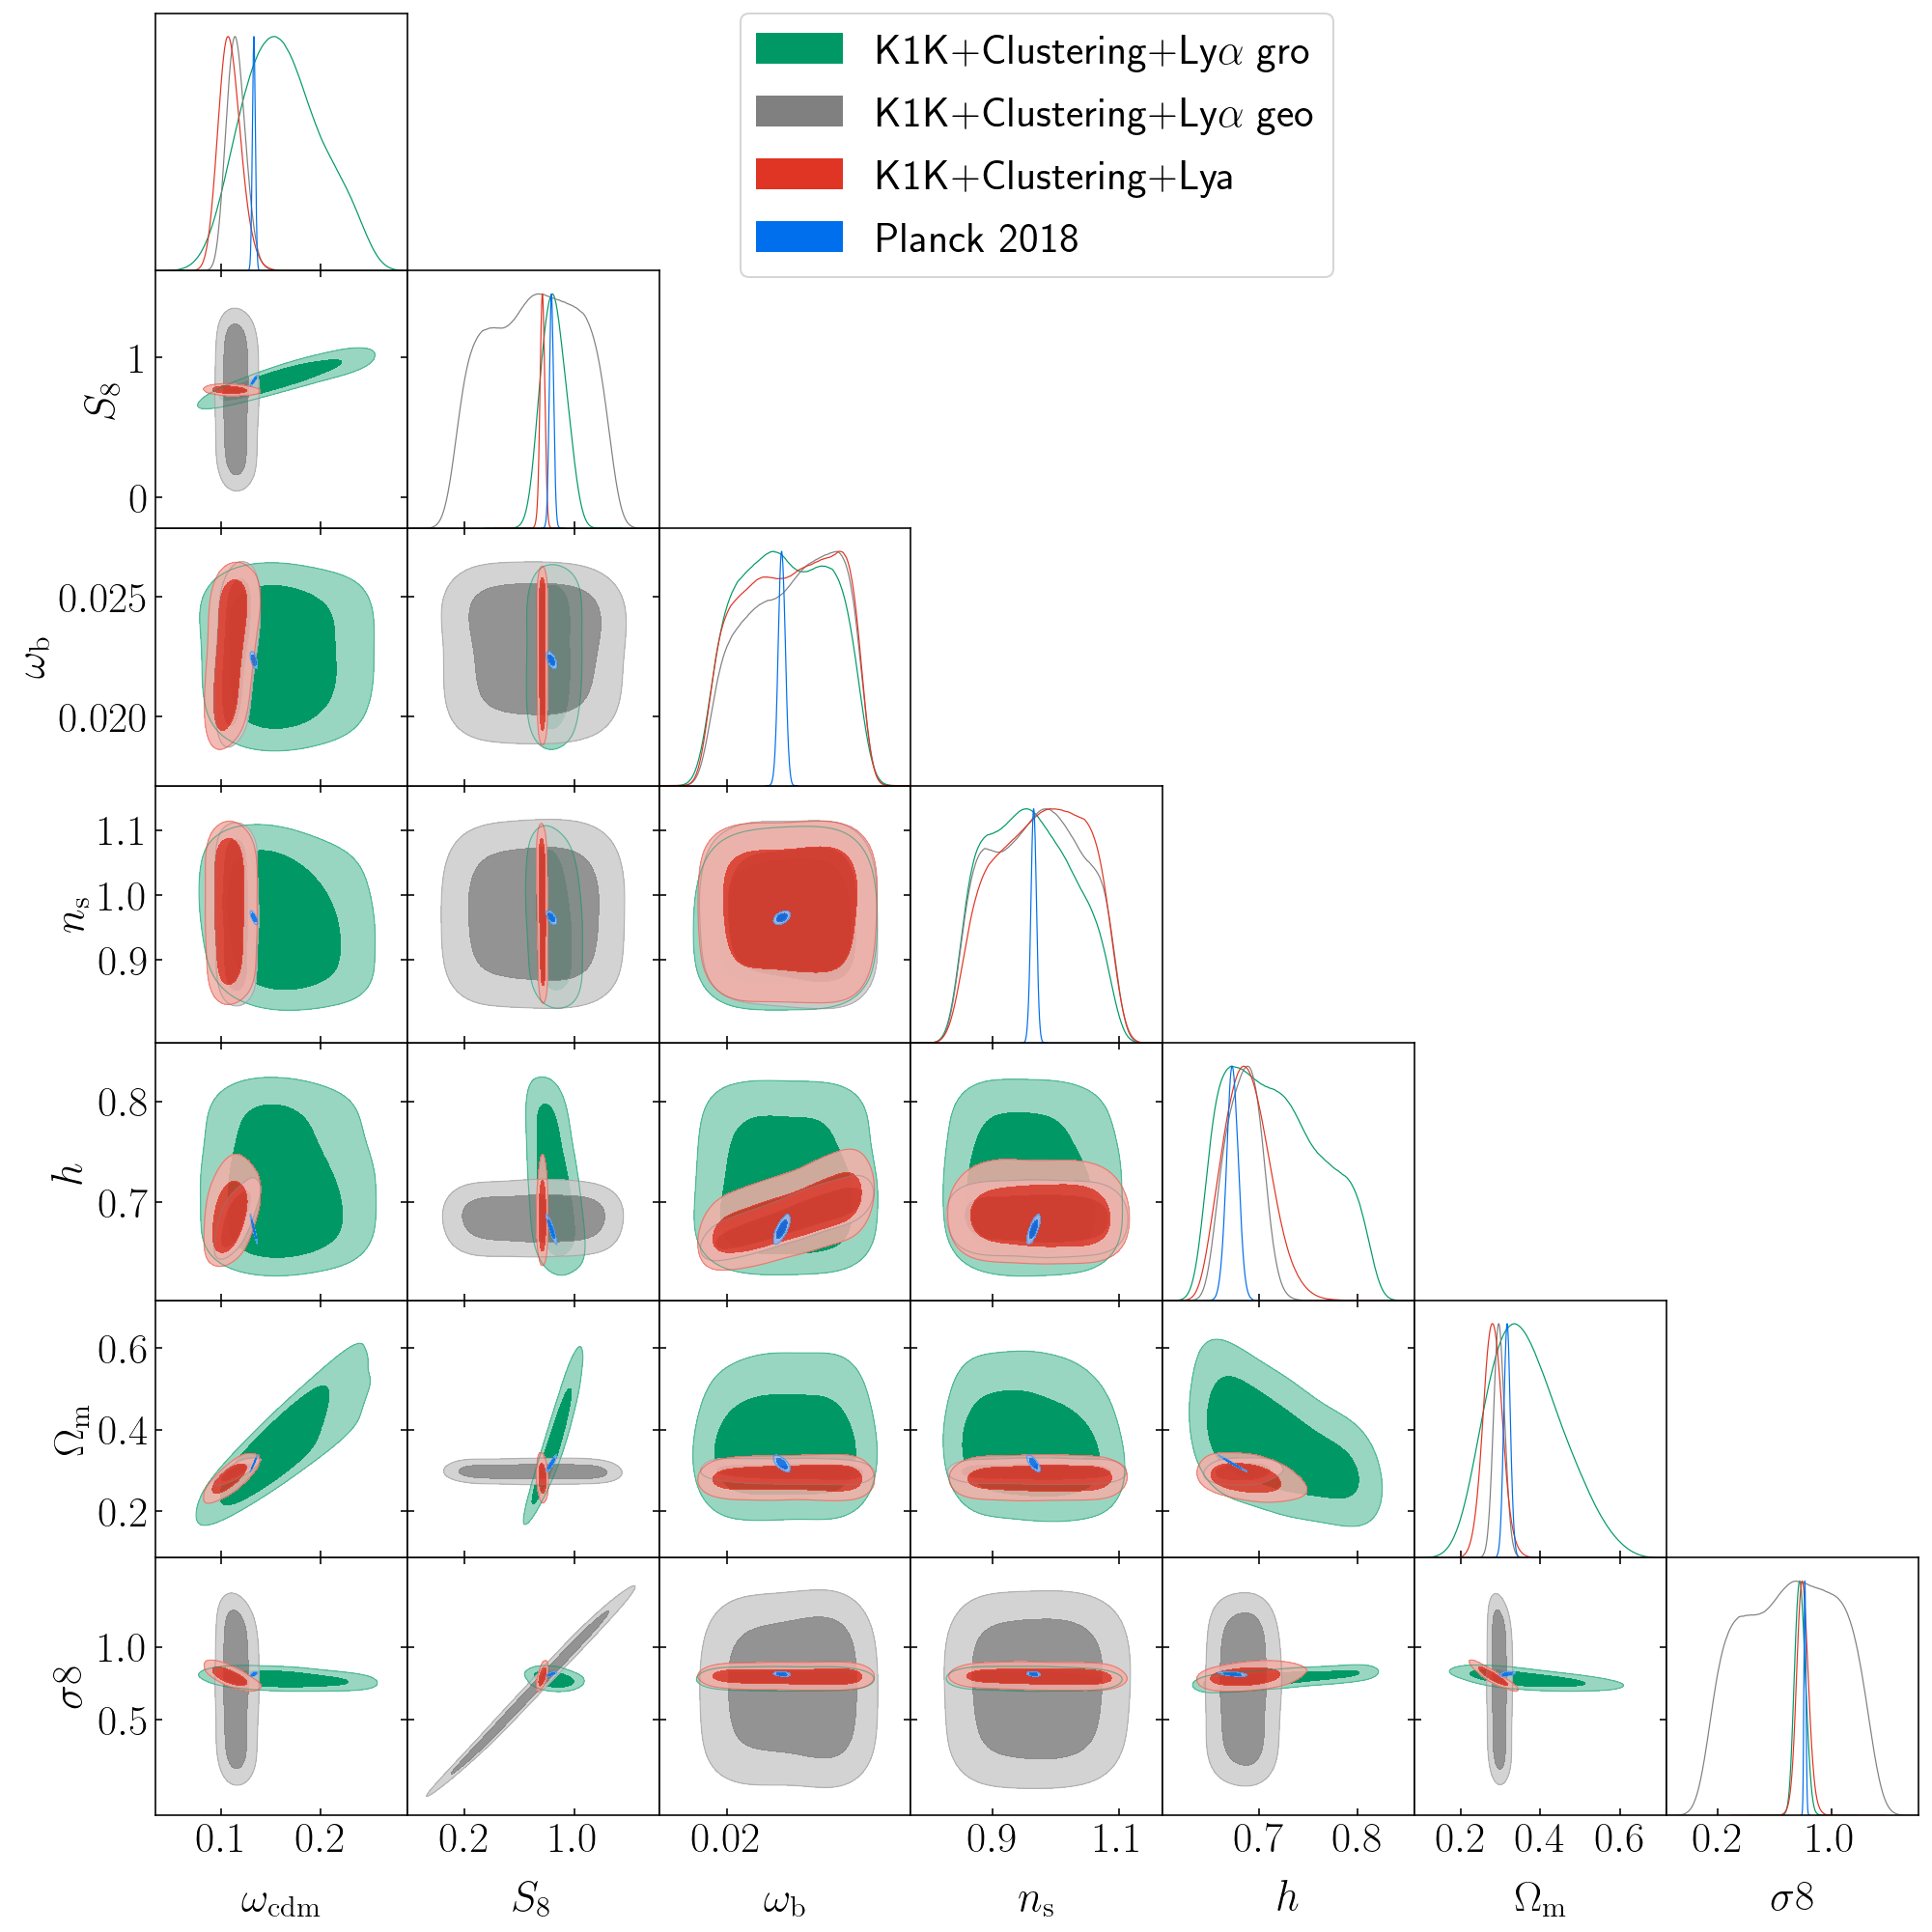

In [18]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot([K1K_ClLy_gro, K1K_ClLy_geo, K1K_ClLy, planck], filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/K1K_ClLy_triangle.pdf')

# K1K Clustering Lyman CMB

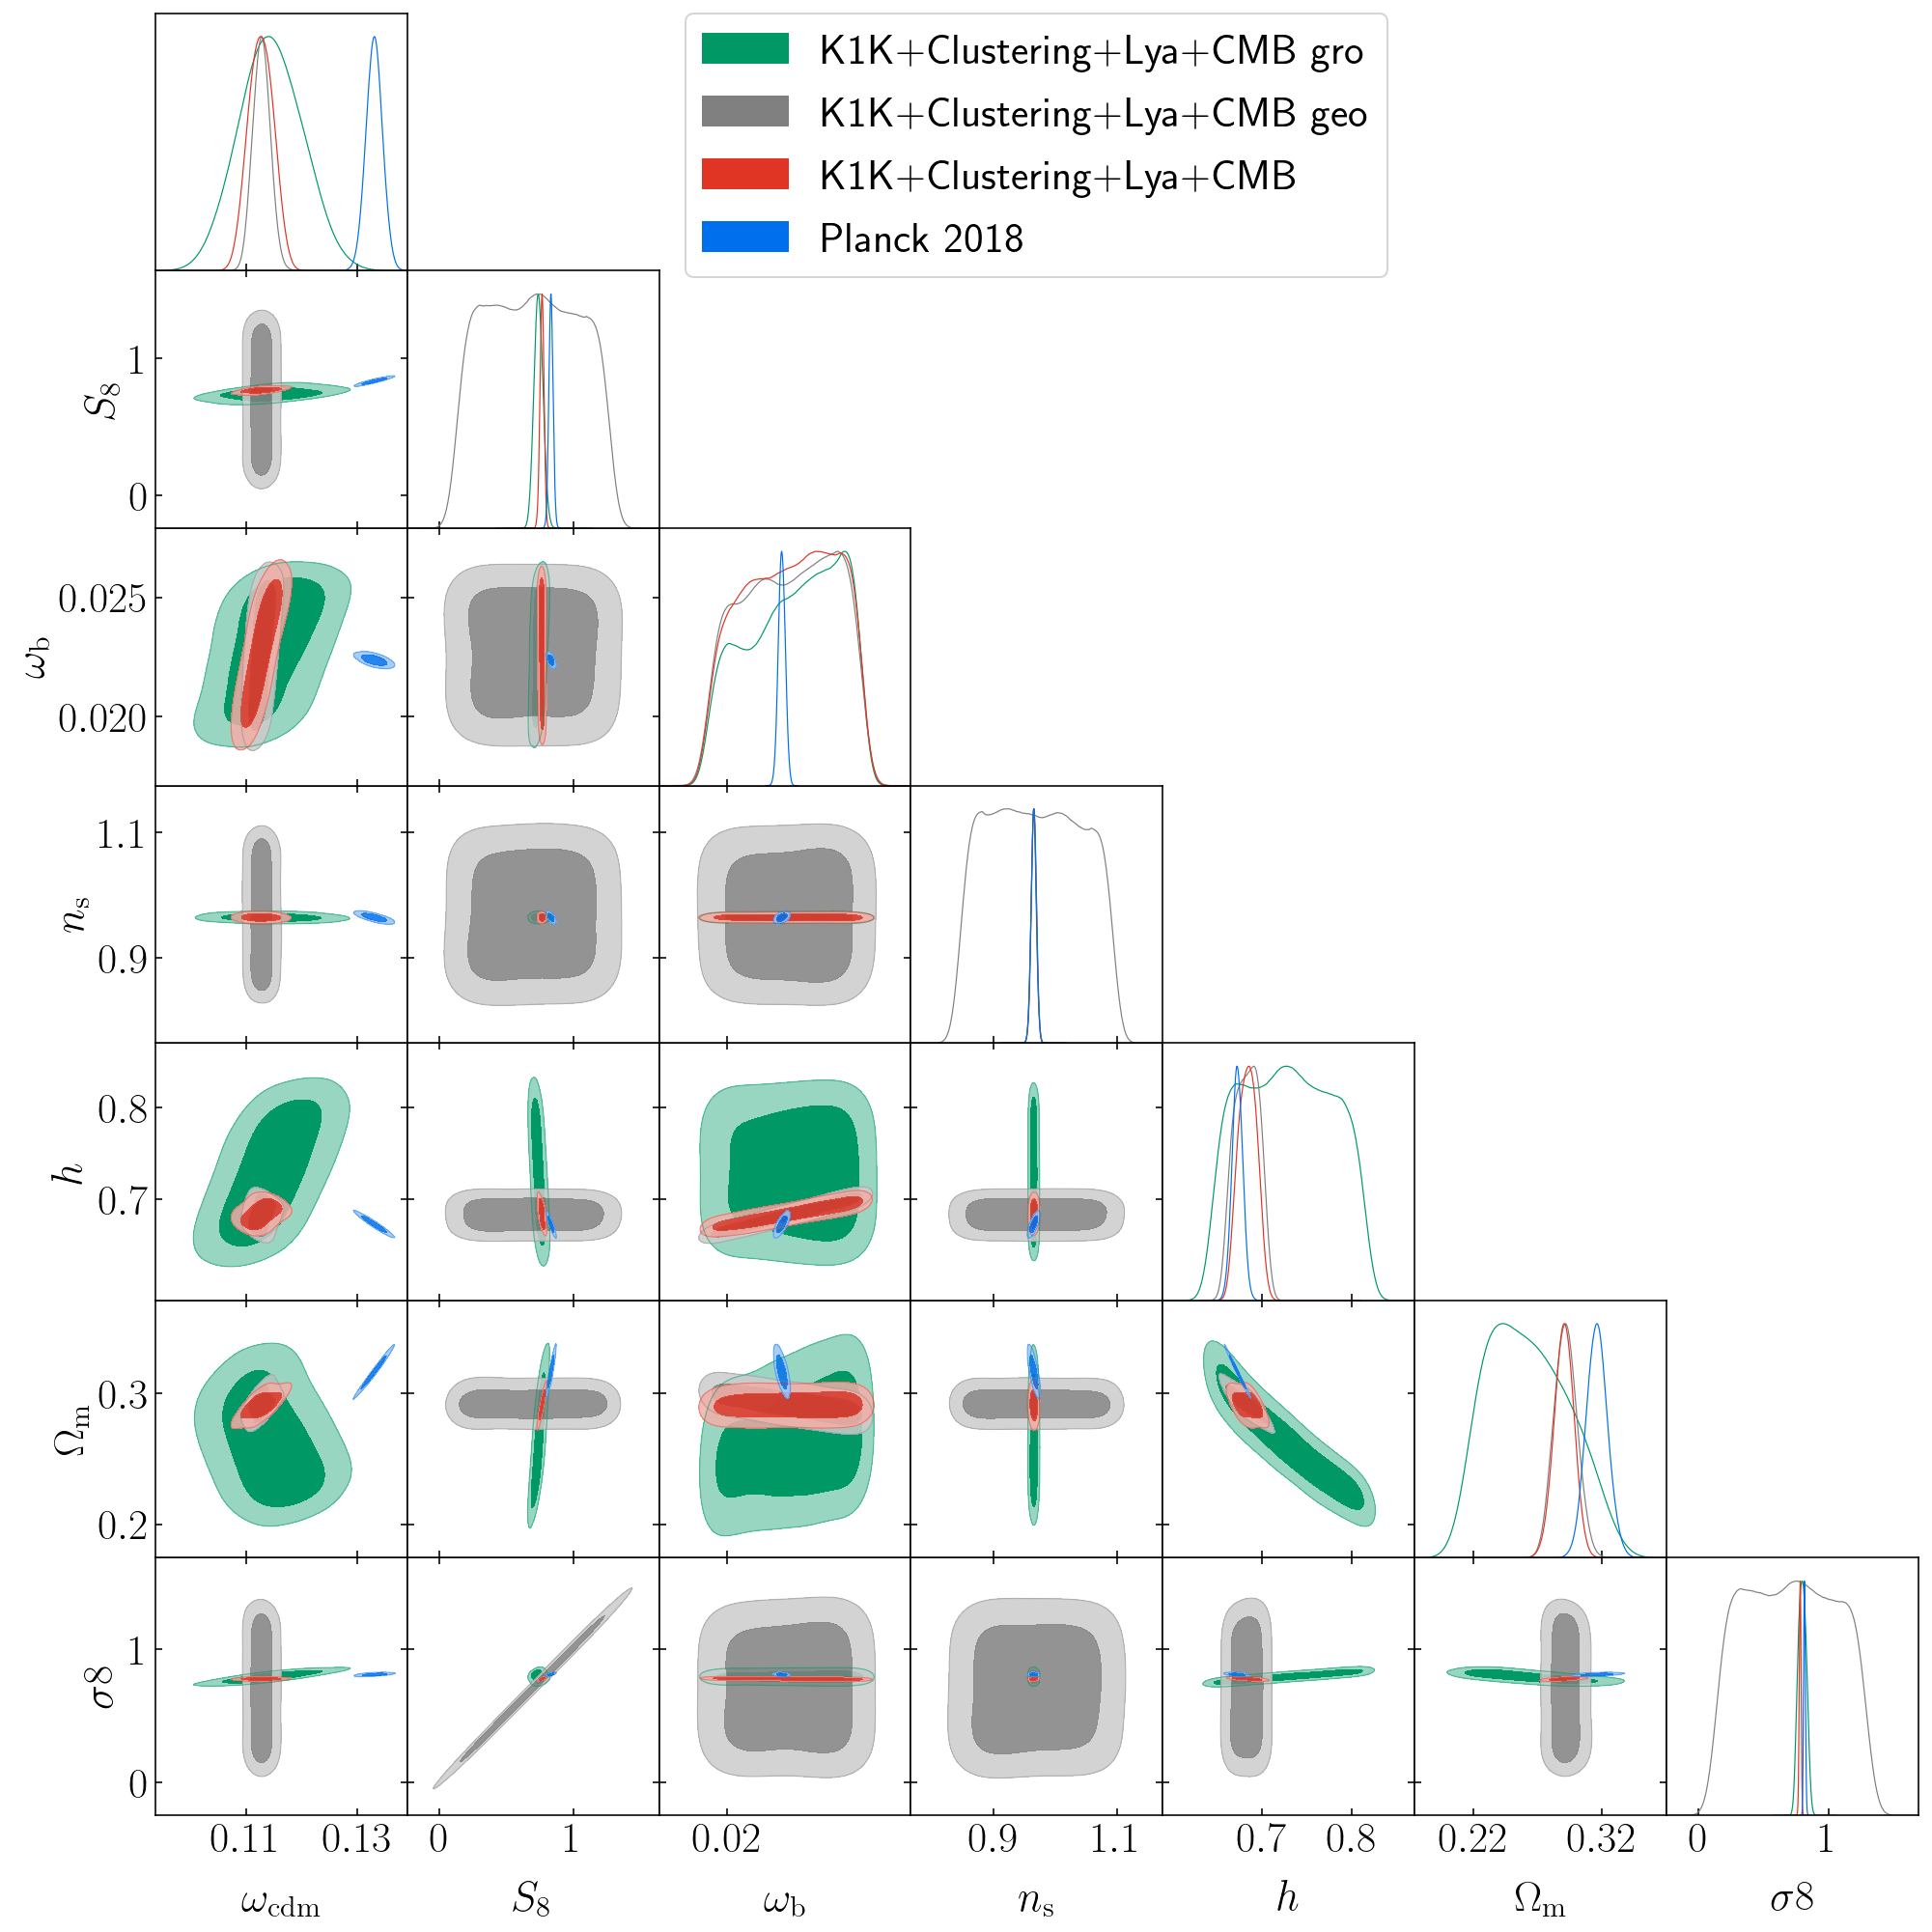

In [19]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot([K1K_ClLyC_gro, K1K_ClLyC_geo, K1K_ClLyC, planck], filled=True)#
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/K1K_ClLyC_triangle.pdf')

# 1D&2D Plots

In [46]:
lims1 = [0.15, 0.5, 0.4, 1.5]
lims2 = [0.5, 1.1, 0.5, 1.1]
lims3 = [0., 0.7]
lims4 = [0, 1.5]
lims5 = [0, 1.5]

plot = {'K1K': [K1K_gro, K1K_geo, K1K, planck],
         'K1K_Cl': [K1K_Cl_gro, K1K_Cl_geo, K1K_Cl, planck],
         'K1K_ClLy':[K1K_ClLy_gro, K1K_ClLy_geo, K1K_ClLy, planck],
         'K1K_ClLyC':  [K1K_ClLyC_gro, K1K_ClLyC_geo, K1K_ClLyC, planck]}

In [65]:
name = 'K1K_ClLyC'

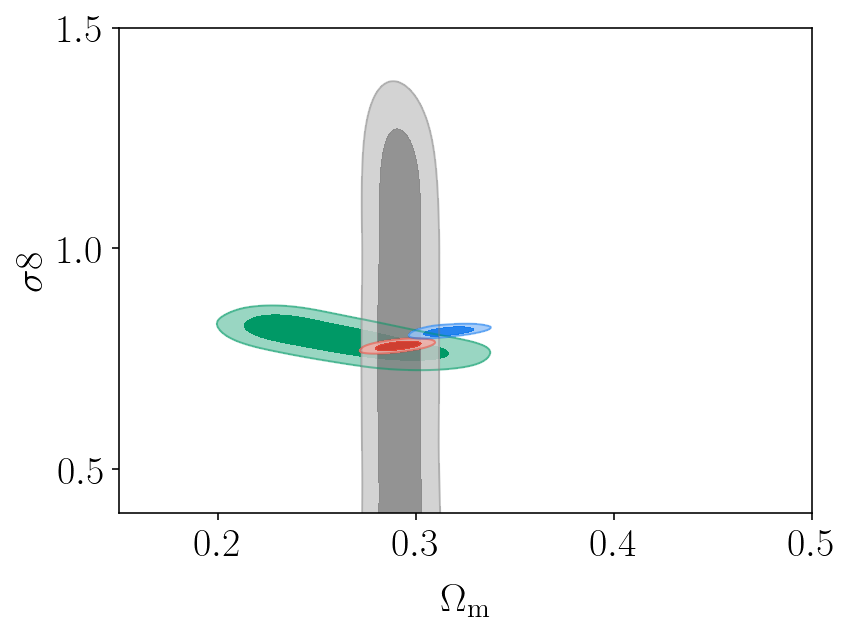

In [66]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d(plot[name], 'Omega_m', 'sigma8', filled=True, lims=lims1);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'_wmsig.png')

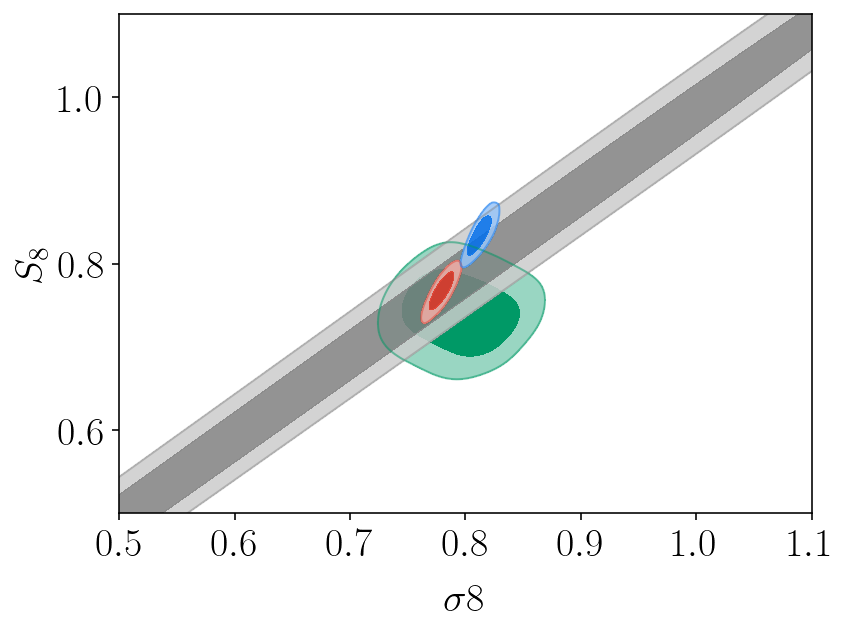

In [67]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d(plot[name],'sigma8', 'S_8', filled=True, lims=lims2);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'_sigS8.png')

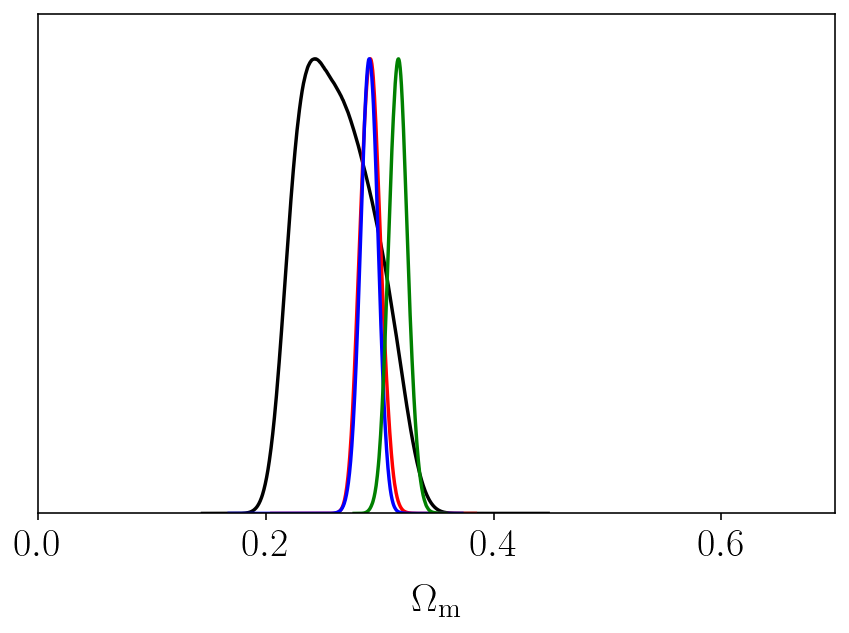

In [68]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_1d(plot[name],'Omega_m', lims=lims3);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'wm'+'.png')

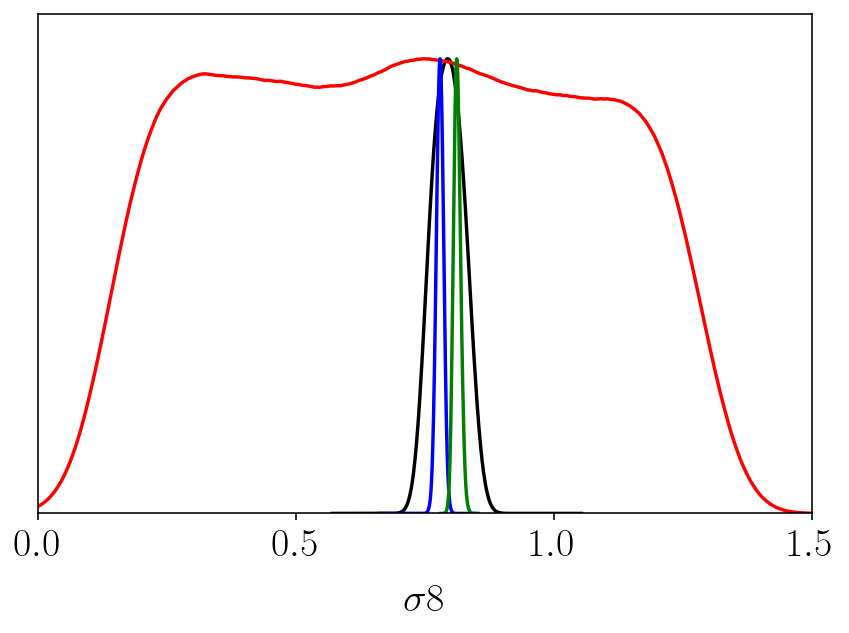

In [69]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_1d(plot[name], 'sigma8', lims=lims4);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'sig'+'.png')

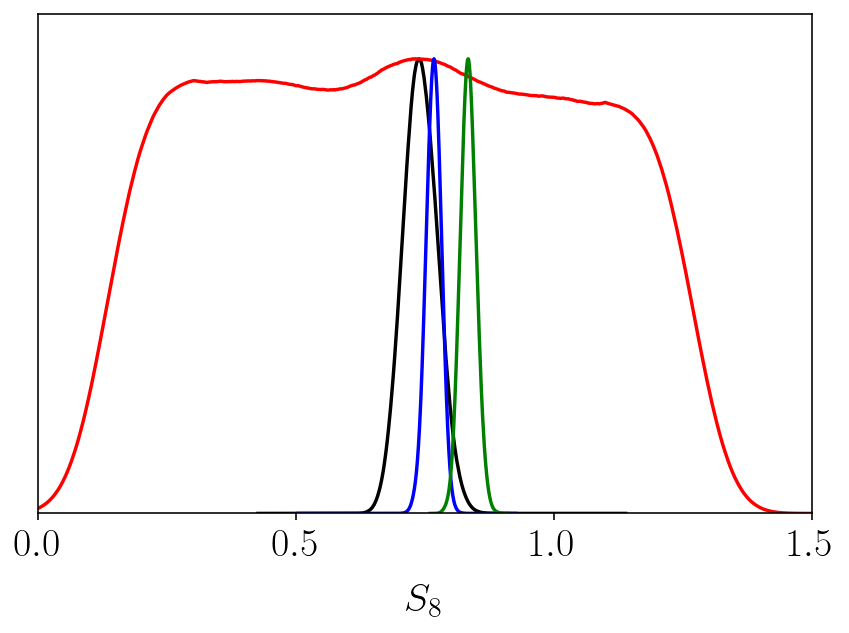

In [70]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_1d(plot[name], 'S_8', lims=lims5);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'S8'+'.png')